```
生成索引
pos_index = np.where(y_total == 1)  
plt.scatter(x_total[pos_index, 0], x_total[pos_index, 1], 
marker='o', color='coral', s=10)  
plt.scatter(x_total[neg_index, 0], x_total[neg_index, 1], 
marker='x', color='dodgerblue', s=10)  
tp = np.cumsum(y_true)累加：每一步都计算相应的值  
tp[-1]相当于最后一个累加后的值，是所有正类数量之和
梯度  
grad = -X.T @ (y_train - pred) + l2_coef * theta  
```
#$\nabla J(\theta) = -X^T(y - \hat{y}) + \lambda\theta$  
`train_loss = - y_train.T @ np.log(pred) 
    - (1 - y_train).T @ np.log(1 - pred)
    + l2_coef * np.linalg.norm(theta) ** 2 / 2 ` 
#$J(\theta) = -[y^T\log(\hat{y}) + (1-y)^T\log(1-\hat{y})] + \frac{\lambda}{2}||\theta||^2$  


`test_loss = - y_test.T @ np.log(test_pred) 
    - (1 - y_test).T @ np.log(1 - test_pred)  `
#$J_{test}(\theta) = -[y_{test}^T\log(\hat{y}_{test}) + (1-y_{test})^T\log(1-\hat{y}_{test})]$

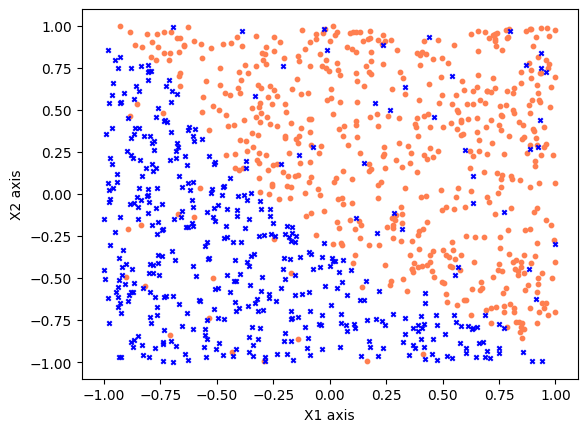

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

data=np.loadtxt('lr_dataset.csv',delimiter=',',dtype=float)
x=data[:,:2]
y=data[:,2]
pos_index=np.where(y==1)
neg_index=np.where(y==0)
plt.scatter(x[pos_index,0],x[pos_index,1],marker='o', color='coral', s=10)
plt.scatter(x[neg_index, 0], x[neg_index, 1], 
    marker='x', color='blue', s=10)
plt.xlabel('X1 axis')
plt.ylabel('X2 axis')
plt.show()

#打乱
ind=np.random.permutation(range(len(x)))
x=x[ind]
y=y[ind]
ratio=0.8
split=int(ratio*len(x))
x_train,x_test=x[:split],x[split:]
y_train,y_test=y[:split],y[split:]



In [3]:
def acc(y_true,y_pred):
    return np.mean(y_true==y_pred)
def auc(y_true,y_pred):
    indx=np.argsort(y_pred)[::-1]
    y_true=y_true[indx]
    y_pred=y_pred[indx]
    tp=np.cumsum(y_true)
    fp=np.cumsum(1-y_true)
    tpr=tp/tp[-1]
    fpr=fp/fp[-1]
    tpr=np.concatenate([[0],tpr])
    fpr=np.concatenate([[0],fpr])
    auc_value=0.0
    for i in range(len(tpr)):
        auc_value+=(fpr[i]-fpr[i-1])*tpr[i]
    return auc_value


In [4]:
# 在x矩阵上拼接1
X = np.concatenate([x_train, np.ones((x_train.shape[0], 1))], axis=1)
X_test = np.concatenate([x_test, np.ones((x_test.shape[0], 1))], axis=1) 
def logistic(z):
    return 1/(1+np.exp(-z))
def GD(num_steps,lr,l2_coef):
    theta=np.random.normal(size=(X.shape[1],))
    train_losses=[]
    test_losses=[]
    train_acc=[]
    test_acc=[]
    train_auc=[]
    test_auc=[]
    for i in range(num_steps):
        y_pre=logistic(X@theta)
        test_pre=logistic(X_test@theta)
        grad = -X.T @ (y_train - y_pre) + l2_coef * theta  
        theta -= lr * grad
        train_loss = - y_train.T @ np.log(y_pre) 
        - (1 - y_train).T @ np.log(1 - y_pre)
        # train_losses.append(train_loss)
        train_losses.append(train_loss/len(X))
        
        + l2_coef * np.linalg.norm(theta) ** 2 / 2
        test_loss = - y_test.T @ np.log(test_pre) 
        - (1 - y_test).T @ np.log(1 - test_pre)
        test_losses.append(test_loss/len(X_test))

        # train_acc.append(acc(y_train,y_pre))
        train_acc.append(acc(y_train,y_pre>=0.5))
        test_acc.append(acc(y_test,test_pre>=0.5))
        train_auc.append(auc(y_train,y_pre))
        test_auc.append(auc(y_test,test_pre))
    return theta,train_losses,test_losses,train_acc,test_acc,train_auc,test_auc

回归系数： [2.92952207 2.81244922 0.51828651]
最终准确率： 0.0


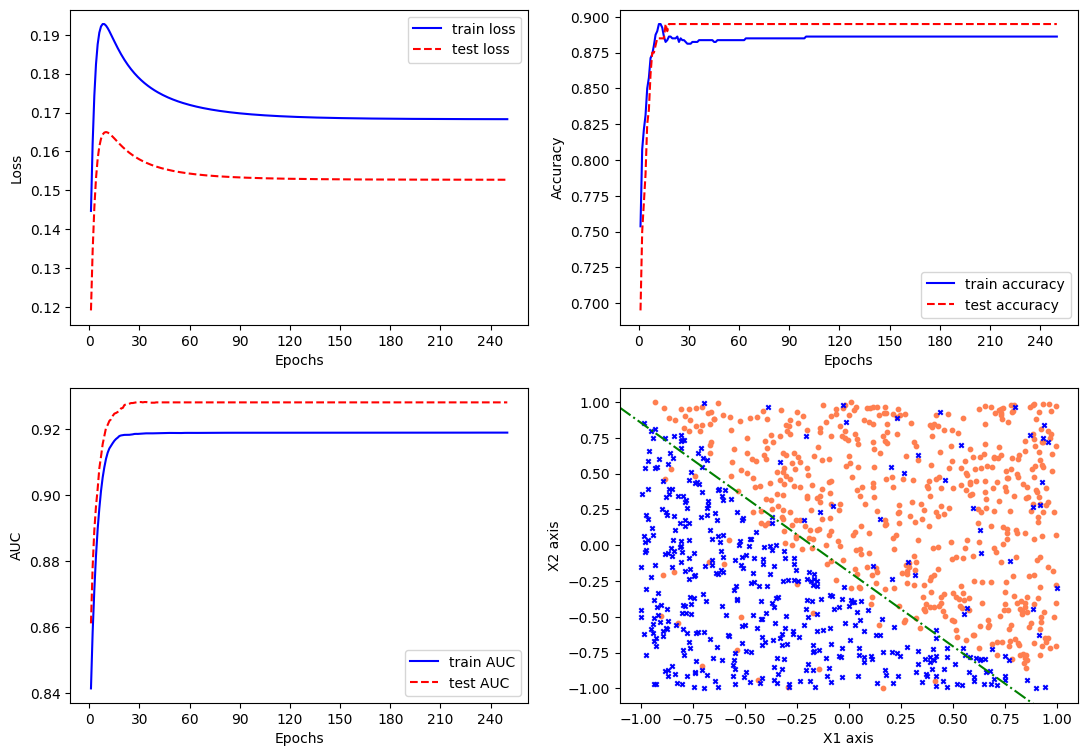

In [5]:
# 在x矩阵上拼接1
X = np.concatenate([x_train, np.ones((x_train.shape[0], 1))], axis=1)
X_test = np.concatenate([x_test, np.ones((x_test.shape[0], 1))], axis=1) 
# 定义梯度下降迭代的次数，学习率，以及L2正则系数
num_steps = 250
learning_rate = 0.002
l2_coef = 1.0
np.random.seed(0)

theta, train_losses, test_losses, train_acc, test_acc, \
    train_auc, test_auc = GD(num_steps, learning_rate, l2_coef)

print('回归系数：',theta)
pre_test=logistic(X_test@theta)
last_acc=acc(y_test,pre_test)
print('最终准确率：',last_acc)

plt.figure(figsize=(13,9))
xticks=np.arange(num_steps)+1

#以下画图展示部分不是我手写的
# 绘制训练曲线
plt.subplot(221)
plt.plot(xticks, train_losses, color='blue', label='train loss')
plt.plot(xticks, test_losses, color='red', ls='--', label='test loss')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 绘制准确率
plt.subplot(222)
plt.plot(xticks, train_acc, color='blue', label='train accuracy')
plt.plot(xticks, test_acc, color='red', ls='--', label='test accuracy')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 绘制AUC
plt.subplot(223)
plt.plot(xticks, train_auc, color='blue', label='train AUC')
plt.plot(xticks, test_auc, color='red', ls='--', label='test AUC')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

# 绘制模型学到的分隔直线
plt.subplot(224)
plot_x = np.linspace(-1.1, 1.1, 100)
# 直线方程：theta_0 * x_1 + theta_1 * x_2 + theta_2 = 0
plot_y = -(theta[0] * plot_x + theta[2]) / theta[1]
pos_index = np.where(y == 1)
neg_index = np.where(y == 0)
plt.scatter(x[pos_index, 0], x[pos_index, 1], 
    marker='o', color='coral', s=10)
plt.scatter(x[neg_index, 0], x[neg_index, 1], 
    marker='x', color='blue', s=10)
plt.plot(plot_x, plot_y, ls='-.', color='green')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('X1 axis')
plt.ylabel('X2 axis')
plt.savefig('output_16_1.png')
plt.savefig('output_16_1.pdf')
plt.show()

In [ ]:
# 使用sklearn实现
from sklearn.linear_model import LogisticRegression

# 使用线性模型中的逻辑回归模型在数据集上训练
# 其提供的liblinear优化算法适合在较小数据集上使用
# 默认使用系数为1.0的L2正则化约束
# 其他可选参数请参考官方文档
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)
print('回归系数：', lr_clf.coef_[0], lr_clf.intercept_)

# 在数据集上用计算得到的逻辑回归模型进行预测并计算准确度
y_pred = lr_clf.predict(x_test)
print('准确率为：',np.mean(y_pred == y_test))


回归系数： [2.93110046 2.81407648] [0.51850418]
准确率为： 0.895
